In [7]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
%matplotlib inline

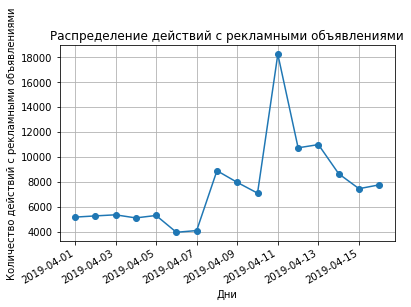

In [40]:
dataset = pd.read_csv('test_data.csv', encoding='utf-8', index_col=False, parse_dates=[0])
X = []
Y = []
Dates = []
for i in range(16):
    X.append(datetime.date(2019, 4, i+1))
    if i+1 < 10:
        Dates.append('2019-04-0' + str(i+1))
    else:
        Dates.append('2019-04-' + str(i+1))
    Y.append(len(dataset[dataset.date == Dates[i]]))
fig, ax = plt.subplots()
ax.plot(X, Y, 'o-')
ax.set_title('Распределение действий с рекламными объявлениями')
ax.set_xlabel('Дни')
ax.set_ylabel('Количество действий с рекламными объявлениями')
fig.autofmt_xdate()
plt.grid()
plt.show()

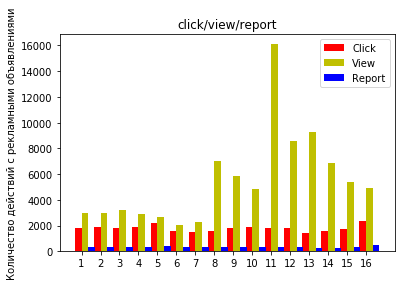

In [41]:
click = []
view = []
report = []
for i in range(16):
    dataset_date = dataset[dataset.date == Dates[i]]
    click.append(len(dataset_date[dataset_date.event == 'click']))
    view.append(len(dataset_date[dataset_date.event == 'view']))
    report.append(len(dataset_date[dataset_date.event == 'report']))    
N = 16
ind = np.arange(N)  
width = 0.35       
fig, ax = plt.subplots()
rects1 = ax.bar(ind, click, width, color='r')
rects2 = ax.bar(ind + width, view, width, color='y')
rects3 = ax.bar(ind + 2*width, report, width, color='b')
ax.set_ylabel('Количество действий с рекламными объявлениями')
ax.set_title('click/view/report')
ax.set_xticks(ind + width / 2)
Z = [i+1 for i in range(16)]
ax.set_xticklabels(Z)
ax.legend((rects1[0], rects2[0], rects3[0]), ('Click', 'View', 'Report'))
plt.show()

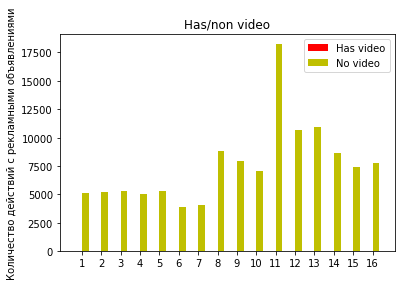

In [42]:
has_video = []
non_video = []
for i in range(16):
    dataset_date = dataset[dataset.date == Dates[i]]
    has_video.append(len(dataset_date[dataset_date.has_video == 1]))
    non_video.append(len(dataset_date[dataset_date.has_video == 0]))
N = 16
ind = np.arange(N)  
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind, has_video, width, color='r')
rects2 = ax.bar(ind + width, non_video, width, color='y')
ax.set_ylabel('Количество рекламных объявлений')
ax.set_title('Has/non video')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(Z)
ax.legend((rects1[0],rects2[0]), ('Has video', 'No video'))
plt.show()


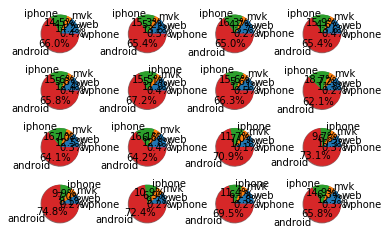

In [44]:
the_grid = GridSpec(4, 4)
labels = 'web', 'mvk', 'iphone', 'android', 'wphone'
for i in range(16):
    A = []
    dataset_date = dataset[dataset.date == Dates[i]]
    A.append(len(dataset_date[dataset_date.platform == 'web']))
    A.append(len(dataset_date[dataset_date.platform == 'mvk']))
    A.append(len(dataset_date[dataset_date.platform == 'iphone']))
    A.append(len(dataset_date[dataset_date.platform == 'android']))
    A.append(len(dataset_date[dataset_date.platform == 'wphone']))
    plt.subplot(the_grid[i // 4, i % 4], aspect=1)
    plt.pie(A, labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()

In [52]:
dataset_11_april = dataset[dataset.date == Dates[10]]
dictionary = {}
for objects in dataset_11_april.client_union_id:
    if objects in dictionary.keys():
        dictionary[objects] += 1
    else:
        dictionary[objects] = 1
maximum = max(dictionary.values())
print(maximum)
for keys in dictionary.keys():
    if dictionary[keys] == maximum:
        print(keys)
        break

13941
client_47270


In [48]:
dictionary1 = {}
for objects in dataset_11_april.campaign_union_id:
    if objects in dictionary1.keys():
        dictionary1[objects] += 1
    else:
        dictionary1[objects] = 1
maximum1 = max(dictionary1.values())
print(maximum1)
for keys1 in dictionary1.keys():
    if dictionary1[keys1] == maximum1:
        print(keys1)
        break

13941
campaign_49554


In [49]:
dictionary2 = {}
for objects in dataset_11_april.agency_union_id:
    if objects in dictionary2.keys():
        dictionary2[objects] += 1
    else:
        dictionary2[objects] = 1
maximum2 = max(dictionary2.values())
print(maximum2)
for keys2 in dictionary2.keys():
    if dictionary2[keys2] == maximum2:
        print(keys2)
        break

14035
agency_2


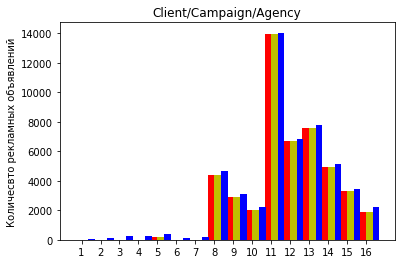

In [50]:
agency = []
client = []
campaign = []
for i in range(16):
    dataset_date = dataset[dataset.date == Dates[i]]
    client.append(len(dataset_date[dataset_date.client_union_id == keys]))
    campaign.append(len(dataset_date[dataset_date.campaign_union_id == keys1]))
    agency.append(len(dataset_date[dataset_date.agency_union_id == keys2]))
N = 16
ind = np.arange(N)  
width = 0.35    
fig, ax = plt.subplots()
rects1 = ax.bar(ind, client, width, color='r')
rects2 = ax.bar(ind + width, campaign, width, color='y')
rects3 = ax.bar(ind + 2*width, agency, width, color='b')
ax.set_ylabel('Количесвто рекламных объявлений')
ax.set_title('Client/Campaign/Agency')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(Z)
ax.legend((rects1[0],rects2[0], rects3[0]), ('Client', 'Campaign', 'Agency'))
plt.show()

In [54]:
sets = set()
for objects in dataset_11_april.time:
    sets.add(objects)
print(len(sets)-len(dataset_11_april))

-2838

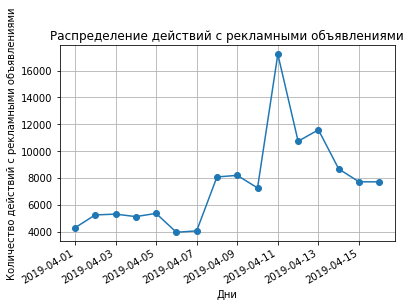

1047


In [61]:
count = 0
A = [0 for i in range(16)]
for objects in dataset.time:
    value = datetime.datetime.fromtimestamp(float(objects))
    for i in range(16):
        if str(value.strftime('%Y-%m-%d')) == Dates[i]:
            A[i] += 1
        else:
            continue
fig, ax = plt.subplots()
ax.plot(X, A, 'o-')
ax.set_title('Распределение действий с рекламными объявлениями')
ax.set_xlabel('Дни')
ax.set_ylabel('Количество действий с рекламными объявлениями')
fig.autofmt_xdate()
plt.grid()
plt.show()
for i in range(16):
    A[i] = abs(A[i] - Y[i])
print(max(A))

In [60]:
dictionary3 = {}
for objects in dataset_11_april.ad_id:
    if objects in dictionary3.keys():
        dictionary3[objects] += 1
    else:
        dictionary3[objects] = 1
count = 0
sums = 0
for keys in dictionary3.keys():
    if dictionary3[keys] > 1:
        count += 1
    sums += dictionary3[keys]
maximum3 = max(dictionary3.values())
print(maximum3)
for keys in dictionary3.keys():
    if dictionary3[keys] == maximum3:
        keys3 = keys
    else:
        dictionary3[keys] = maximum3 - dictionary3[keys]
minimum = maximum3 - min(dictionary3.values())
print(minimum)
for keys in dictionary3.keys():
    if dictionary3[keys] == maximum3 - minimum:
        break

9640
3455


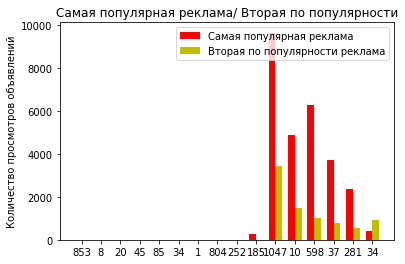

In [67]:
ad = []
ad1 = []
for i in range(16):
    dataset_date = dataset[dataset.date == Dates[i]]
    ad.append(len(dataset_date[dataset_date.ad_id == keys3]))
    ad1.append(len(dataset_date[dataset_date.ad_id == keys]))
N = 16
ind = np.arange(N)  
width = 0.35 
fig, ax = plt.subplots()
rects1 = ax.bar(ind, ad, width, color='r')
rects2 = ax.bar(ind + width, ad1, width, color='y')
ax.set_ylabel('Количество просмотров объявлений')
ax.set_title('Самая популярная реклама/ Вторая по популярности')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(Z)
ax.legend((rects1[0], rects2[0]), ('Самая популярная реклама', 'Вторая по популярности реклама'))
plt.show()
dataset_11_april_keys = dataset_11_april[dataset_11_april.ad_id == keys]
dataset_11_april_keys3 = dataset_11_april[dataset_11_april.ad_id == keys3]
for objects in dataset_11_april_keys.agency_union_id:
    if objects == 'agency_2':
        continue
    else:
        print('Несостыковка')
for objects in dataset_11_april_keys.agency_union_id:
    if objects == 'agency_2':
        continue
    else:
        print('Несостыковка')